## Análise de dados de uma empresa aérea

Nesse projeto, irei reconhecer os dados de preço das passagens aéreas para os meus clientes e como os preços das companhias aéreas mudam com base em diferentes fatores.

Como são os preços das passagens econômicas? Quais são os valores mais altos e baixos? O que seria considerado a média?

## Análise Univariada

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
376.5852530821279
380.56


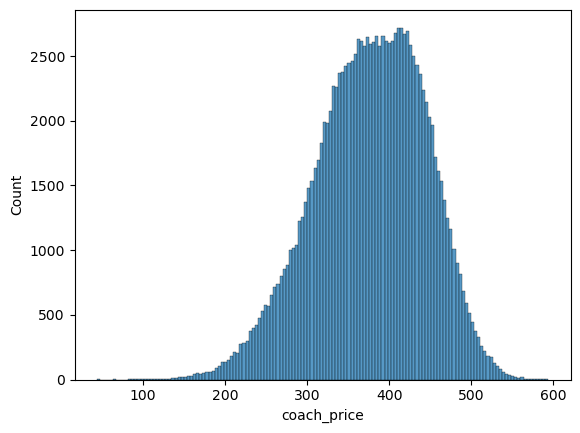

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

flight = pd.read_csv("flight.csv")
print(flight.head())

print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

sns.histplot(flight.coach_price)
plt.show()


Agora irei análisar os preços para as passagens com 8 horas de duração, o seu maior preço, o menor e o preço médio.

431.8343773728164
437.115
170.77


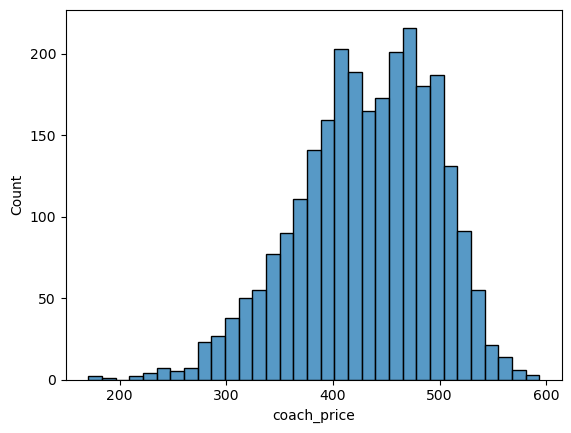

In [12]:
plt.clf()
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))
print(np.min(flight.coach_price[flight.hours == 8]))

sns.histplot(flight.coach_price[flight.hours == 8])

plt.show()


Agora irei analisar como estão distribuidos os tempos de atraso dos voos, com que frequência há grandes atrasos e quais os tempos de atraso que são mais comuns.

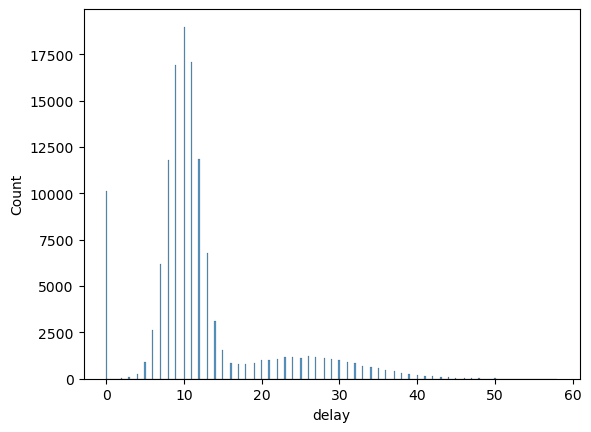

In [3]:
plt.clf()
sns.histplot(flight.delay[flight.delay <= 500])
plt.show()

## Análise Bivariada

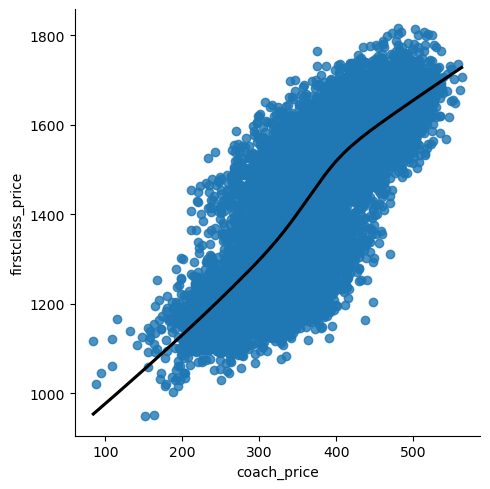

In [4]:
plt.clf()
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()

Qual a relação do preço da passagem econômica com os recursos a bordo(refeição, entretenimento, wi-fi)? Quais os recursos estão associados com o aumento do preço?

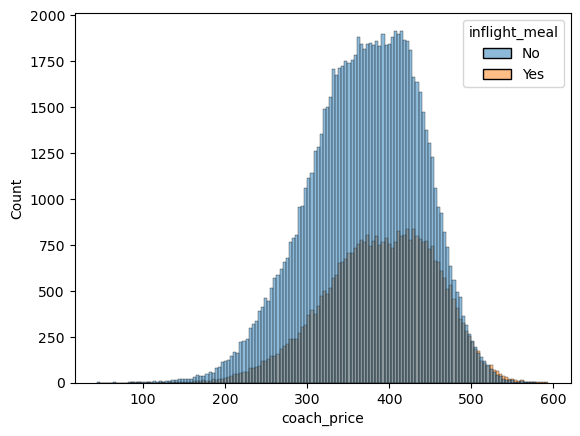

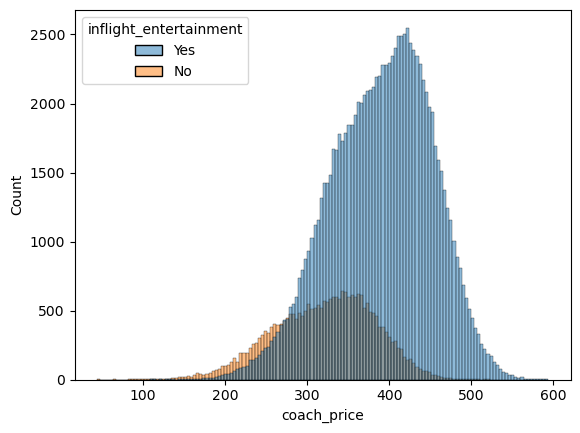

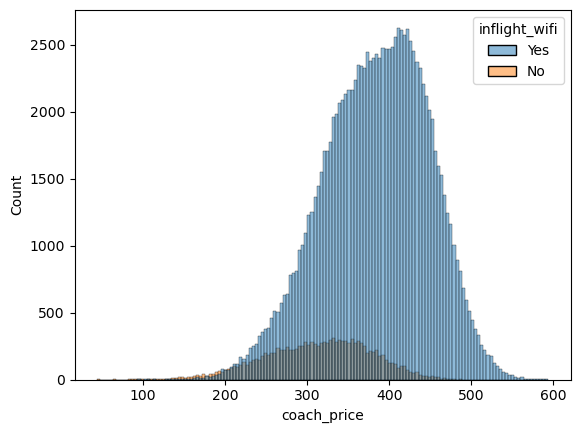

<Figure size 640x480 with 0 Axes>

In [10]:
# Refeições
sns.histplot(flight, x = 'coach_price', hue = flight.inflight_meal)
plt.show()
plt.clf()

# Entretenimento
sns.histplot(flight, x = 'coach_price', hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# WiFi

sns.histplot(flight, x = 'coach_price', hue = flight.inflight_wifi)
plt.show()
plt.clf()

Como o numero de passageiros muda em relação à duração dos voos?

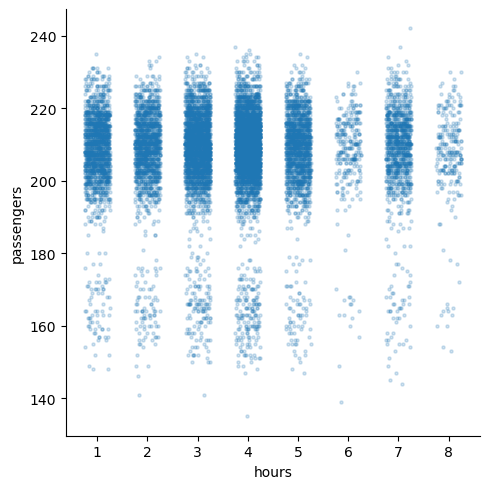

<Figure size 640x480 with 0 Axes>

In [7]:
sns.lmplot(x = 'hours', y = 'passengers', data = flight_sub, x_jitter = 0.25, scatter_kws = {'s': 5, 'alpha': 0.2}, fit_reg = False)
plt.show()
plt.clf()

## Análise Multivariada

Irei visualizar a relação de preço entre a classe ecônomica e a primeira classe nos finais de semana comparada com os dias uteis da semana.

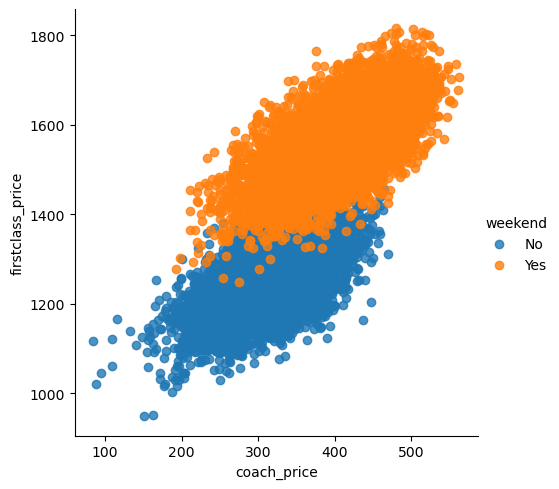

<Figure size 640x480 with 0 Axes>

In [11]:
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.show()
plt.clf()

Como o preço das passagens econômicas diferem para voos em que partem à noite com previsão de chegada para a manhâ seguinte:

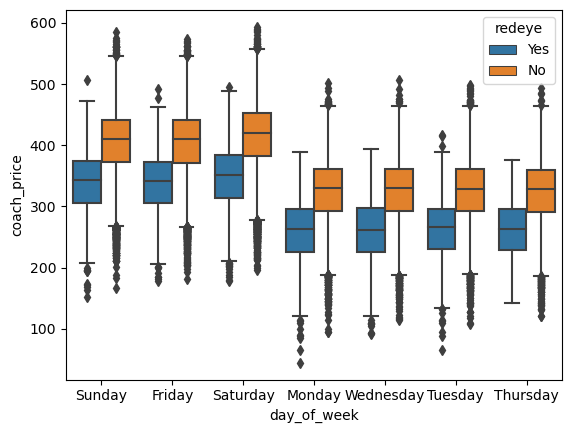

<Figure size 640x480 with 0 Axes>

In [9]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()